In [1]:
from dask.distributed import Client, progress
# HPC
# client = Client(scheduler_file='/glade/scratch/jhamman/scheduler.json')
# client

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=10)
cluster

In [2]:
client = Client(cluster)
client

Client Scheduler: tcp://10.32.1.28:36103 Dashboard: /user/0000-0001-7783-5629/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
import sys, glob
import numpy as np
import xarray as xr
import xscale.spectral.fft as xfft
import Wavenum_freq_spec_func as wfs


In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
from matplotlib.colors import LogNorm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


In [5]:
%time

import gcsfs

fs = gcsfs.GCSFileSystem(project='pangeo-181919', token='anon', access='read_only')

gcsmapgrid=gcsfs.mapping.GCSMap('pangeo-data/eNATL60-BLBT02-SSV-1h',gcs=fs,check=False,create=False)
dsv=xr.open_zarr(gcsmapgrid)



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [6]:
gcsmapgridu=gcsfs.mapping.GCSMap('pangeo-data/eNATL60-BLBT02-SSU-1h',gcs=fs,check=False,create=False)
dsu=xr.open_zarr(gcsmapgridu)


In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


In [8]:
def plot_surf(sub,data,lon,lat,vmin,vmax,cmap,title,date):
    
    ax = plt.subplot(sub,projection=ccrs.PlateCarree(central_longitude=0))
    land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.contourf(lon,lat,data,np.arange(-2,2,0.1),cmap=cmap)
    plt.colorbar(orientation='horizontal',pad=0.1, aspect=50)
    plt.title(title)
    ax.text(0.57, -0.08, date, transform=ax.transAxes)


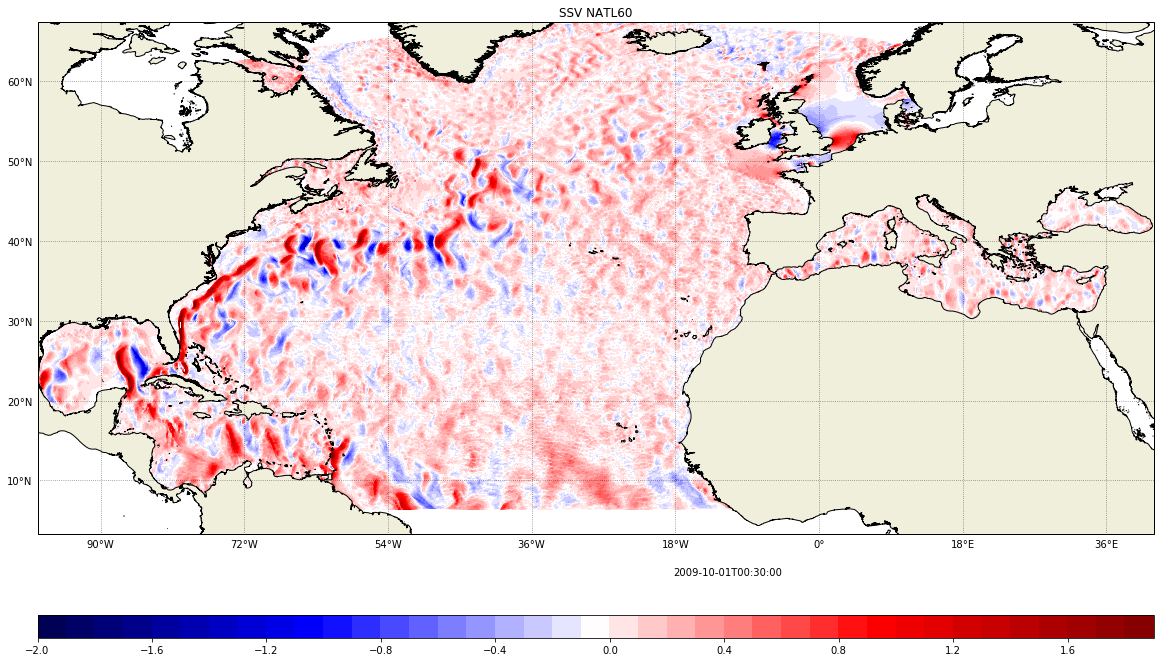

In [9]:
date='2009-10-01T00:30:00'
lat=dsv.nav_lat.values
lon=dsv.nav_lon.values


data=dsv.sel(time_counter=date)['somecrty'].values

fig=plt.figure(figsize=(20,15))
plot_surf(111,data,lon,lat,-2,2,div_cmap,'SSV NATL60',date)

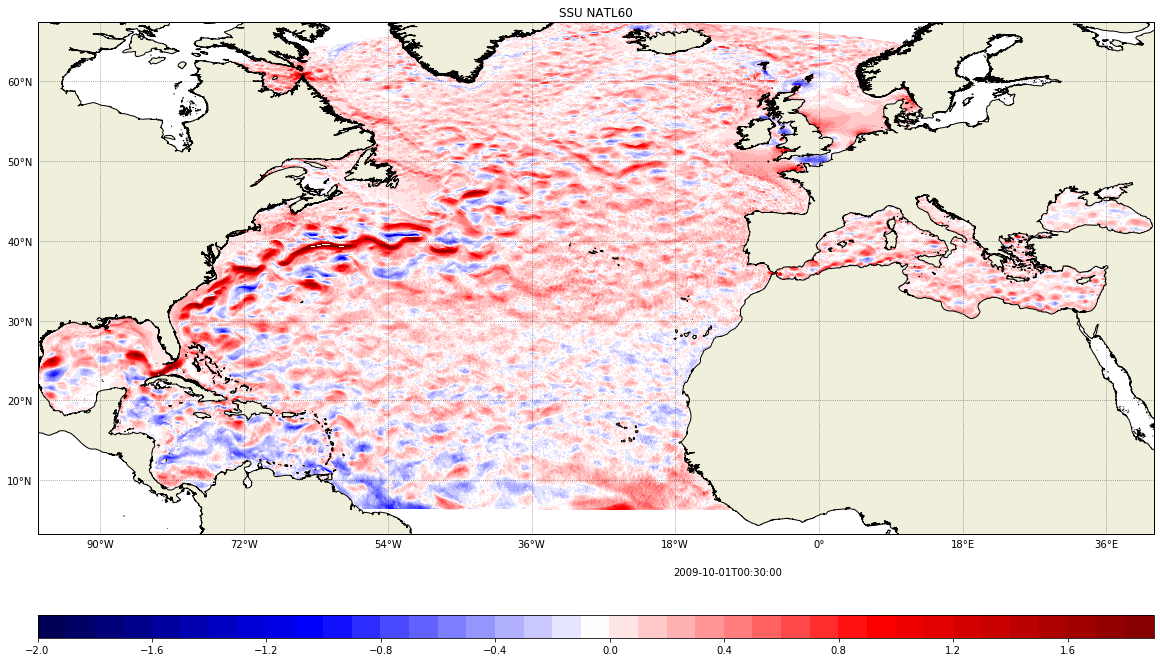

In [11]:
lat=dsu.nav_lat.values
lon=dsu.nav_lon.values


data=dsu['sozocrtx'][10]

fig=plt.figure(figsize=(20,15))
plot_surf(111,data,lon,lat,-2,2,div_cmap,'SSU NATL60',date)